In [21]:
%load_ext autoreload
%autoreload 2
from course_helpers import *
from helpers import *
import matplotlib.pyplot as plt

DATA_PATH = 'full_data/'


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
Dataset = read(DATA_PATH)
print('reading done')
# Dataset = clean(Dataset)
# print('cleaning done')
# save_to_file(Dataset, DATA_PATH)
# print('saving done')


['train_neg_full.txt', 'train_pos_full.txt']
reading done
cleaning done
saving done


In [8]:
!cat full_data/train_pos_full_clean.txt full_data/train_neg_full_clean.txt | sed "s/ /\n/g" | grep -v "^\s*$" | sort | uniq -c > full_data/vocab_full.txt

In [9]:
!cat full_data/vocab_full.txt | sed "s/^\s\+//g" | sort -rn | grep -v "^[1234]\s" | cut -d' ' -f2 > full_data/vocab_cut.txt

In [9]:
vocab_cut = DATA_PATH+'vocab_cut.txt'
vocab_pkl = DATA_PATH+'vocab_pkl.pkl'
coco_pkl = DATA_PATH+'coco_pkl.pkl'
embd = DATA_PATH+'embeddings'
# pickle_vocab(vocab_cut, vocab_pkl)
# cooc_(vocab_pkl, DATA_PATH, coco_pkl)
# glove(coco_pkl, embd)


In [13]:
# with open(coco_pkl, "rb") as f:
#         cooc = pickle.load(f)
# print(cooc.shape)
with open(vocab_pkl, "rb") as f:
        vocab = pickle.load(f)
print(len(vocab))
# embedding = np.load(embd+'.npy')
# print(embedding.shape)
#glove_embd = embedding
Dataset = read(DATA_PATH)
print('reading done')

82391
['coco_pkl.pkl', 'vocab_cut.txt', 'embeddings_20.npy', 'train_neg_full.txt', 'train_pos_full.txt', 'train_pos_full_clean.txt', 'vocab_pkl.pkl', 'train_set_token_full.csv', 'test_set_token.csv', 'vocab_full.txt', 'test_data_clean.txt', 'train_neg_full_clean.txt']
reading done


In [14]:
Dataset

{'vocab_cut': ['<user>',
  '.',
  'i',
  '!',
  '<number>',
  'the',
  ',',
  'to',
  'you',
  '<repeat>',
  'a',
  '(',
  'and',
  '<url>',
  'is',
  'my',
  'not',
  'it',
  'me',
  '?',
  'of',
  'for',
  'in',
  'that',
  'have',
  '"',
  'am',
  'so',
  '<elong>',
  'on',
  'with',
  'this',
  '-',
  'do',
  'be',
  ')',
  'are',
  'but',
  'will',
  'just',
  ':',
  'rt',
  'your',
  'was',
  'like',
  'love',
  'at',
  'all',
  'we',
  'get',
  'lol',
  'up',
  'u',
  'x',
  'know',
  'good',
  'no',
  '/',
  '&',
  'now',
  'what',
  'one',
  'when',
  'go',
  'can',
  'out',
  'if',
  'day',
  'too',
  'from',
  'he',
  'see',
  'want',
  'please',
  'would',
  'how',
  'follow',
  "'",
  'back',
  'got',
  'about',
  'really',
  'time',
  'its',
  'haha',
  'today',
  'they',
  'she',
  'im',
  'ca',
  'thanks',
  'there',
  'going',
  '<heart>',
  'think',
  'as',
  'did',
  '*',
  'miss',
  'her',
  'need',
  'why',
  'an',
  'well',
  'or',
  'much',
  'new',
  'oh',
  'by

In [15]:
train_pos, train_neg, test_set = read_data_full(Dataset)
train_set = pd.concat([train_pos, train_neg],  axis=0, ignore_index=True)
train_set = pd.concat([train_set.drop(labels='sentiment', axis=1), train_set['sentiment']], axis = 1)



In [16]:
vocab_pkl = 'full_data/vocab_pkl.pkl'
with open(vocab_pkl, "rb") as f:
        vocab = pickle.load(f)
print(len(vocab))

82391


In [19]:
train_set.loc[:, train_set.columns!='sentiment'] = train_set.applymap(lambda x: find_token(x, vocab))
test_set2 =  test_set.applymap(lambda x: find_token(x, vocab))
train_set.to_csv('full_data/train_set_token_full.csv', index= False)
test_set2.to_csv('full_data/test_set_token.csv', index= False)

/tmp/ipykernel_3220184/3392401804.py:1: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  train_set.loc[:, train_set.columns!='sentiment'] = train_set.applymap(lambda x: find_token(x, vocab))


<BarContainer object of 144 artists>

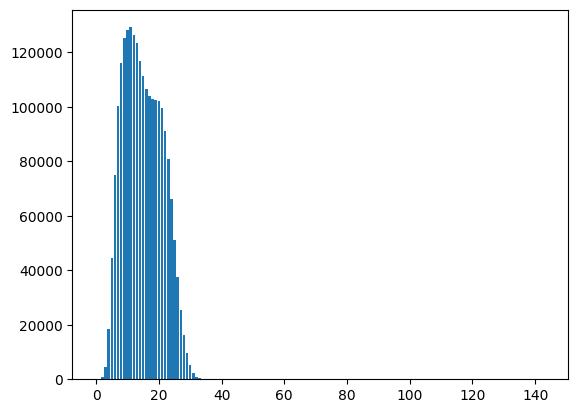

In [22]:
X_train = train_set.loc[:, train_set.columns!='sentiment']

#histogram of number of tokens per tweet
histogram = X_train
histogram['num_uniq'] = histogram.apply(pd.Series.nunique, axis=1)
histogram = histogram['num_uniq']
hist,bins = np.histogram(histogram,bins = [i for i in range(0, 145, 1)]) 
plt.bar(bins[:-1], hist)

<BarContainer object of 144 artists>

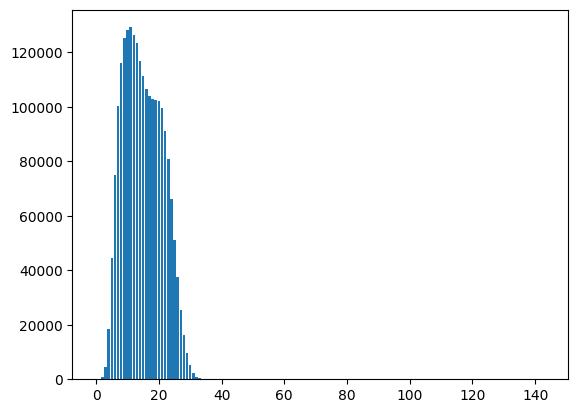

In [23]:
plt.bar(bins[:-1], hist)